In [1]:
# PROBLEMA DE OTIMIZAÇÃO COMBINATÓRIA - "Travelling Salesman Problem"

# O Berlin52 é uma lista de 52 localização e suas coordenadas euclideandas num sistema de coordenadas
# cartesianas sobreposto à cidade de Berlim
# Qual é a distância minima que o vendedor tem de percorrer para ir às 52 localizações?

# 1º - solução inicial
# 2º - solução otimizada

In [3]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance_matrix

In [4]:
#leitura do Dataset
locations = pd.read_table(r'C:\Users\andre\OneDrive\Ambiente de Trabalho\EDIT\PROGRAMA\04. Business Analytics\Exercicios Práticos\berlin52.tsp', skiprows=6, skipfooter=1, sep=' ', names=('location_id', 'x', 'y'), engine='python')

#criar coluna index
locations = locations.set_index('location_id')
print(locations)

                  x       y
location_id                
1             565.0   575.0
2              25.0   185.0
3             345.0   750.0
4             945.0   685.0
5             845.0   655.0
6             880.0   660.0
7              25.0   230.0
8             525.0  1000.0
9             580.0  1175.0
10            650.0  1130.0
11           1605.0   620.0
12           1220.0   580.0
13           1465.0   200.0
14           1530.0     5.0
15            845.0   680.0
16            725.0   370.0
17            145.0   665.0
18            415.0   635.0
19            510.0   875.0
20            560.0   365.0
21            300.0   465.0
22            520.0   585.0
23            480.0   415.0
24            835.0   625.0
25            975.0   580.0
26           1215.0   245.0
27           1320.0   315.0
28           1250.0   400.0
29            660.0   180.0
30            410.0   250.0
31            420.0   555.0
32            575.0   665.0
33           1150.0  1160.0
34            700.0 

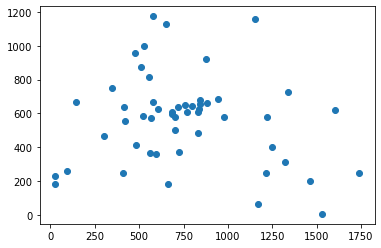

In [5]:
#gráfico de dispersão com repsentação das coordenadas das localizações do dataset

plt.plot(locations.x, locations.y, 'o')

In [6]:
#matrix de distâncias - cálculo de distâncias entre todos os pontos

dist_mat = pd.DataFrame(distance_matrix(locations[['x', 'y']], locations[['x', 'y']]),
                        index=locations.index,
                        columns=locations.index)

#visualizar output da dataframe
print(dist_mat)

location_id           1            2            3            4           5   \
location_id                                                                   
1               0.000000   666.108099   281.113856   395.600809  291.204396   
2             666.108099     0.000000   649.326574  1047.091209  945.145491   
3             281.113856   649.326574     0.000000   603.510563  508.944987   
4             395.600809  1047.091209   603.510563     0.000000  104.403065   
5             291.204396   945.145491   508.944987   104.403065    0.000000   
6             326.266762   978.084863   542.517281    69.641941   35.355339   
7             640.800281    45.000000   610.573501  1026.364945  923.593525   
8             426.878203   956.151139   308.058436   525.000000  470.558179   
9             600.187471  1134.955946   485.643902   611.003273  583.630876   
10            561.471282  1132.982789   487.262763   533.900740  513.468597   
11           1040.973102  1638.787662  1266.688596  

In [7]:
# NEAREST NEIGHBOUR - definição dos parâmetros para indetificar a localização mais próxima 

# Definição do ponto inicial e final -- ponto inicial e final é o ponto 1 (1             x=565.0   y=575.0)
# Para alterar o ponto inicial/final start_and_finish_point= ->1<-

def build_initial_solution(dist_mat, start_and_finish_point=1):
#função para descobrir qual é o ponto pontecialmente mais próximo com base na distância mínima encontrada
    
    route = list()
    route.append(start_and_finish_point)
    
    for point in dist_mat.columns:
        potential_next_points = dist_mat[point].loc[[p not in route for p in dist_mat.columns]]
        try:
            next_point = potential_next_points.idxmin()
            route.append(next_point)
        except ValueError:
            break
            
    # Closing the cycle        
    route.append(start_and_finish_point)
    
    return route

In [8]:
# Função dedicada para criação gráfico representativo da rota

def plot_route(route):
    r = dict()
    r['location_id'] = route
    r['x'] = list()
    r['y'] = list()
    
    for location in route:
        r['x'].append(locations.x[location])
        r['y'].append(locations.y[location])
        
    df = pd.DataFrame(r)
    df = df.set_index('location_id')
    
    return plt.plot(df.x, df.y, '-o')

In [9]:
# Calcular a distância total

def total_distance(route, dist_mat):
    total_dist = 0
    
    for i, point in enumerate(route):
        try:
            next_point = route[i + 1]
        except IndexError:
            break
        
        total_dist += dist_mat[point][next_point]
        
    return total_dist

In [10]:
# Função para definição dos parâmetros algoritmo _2opt

def swap_2opt(route, i, k):
    assert i >= 0 and i < (len(route) - 1)
    assert k > i and k < len(route)
    new_route = route[0:i]
    new_route.extend(reversed(route[i:k + 1]))
    new_route.extend(route[k+1:])
    assert len(new_route) == len(route)
    return new_route

In [11]:
#  Função que permite encontrar a route com menor distância total entre os pontos

def local_search(route):
    improvement = True
    best_route = route
    best_distance = total_distance(route, dist_mat)
    while improvement: 
        improvement = False
        for i in range(1, len(best_route) - 2):
            for k in range(i+1, len(best_route) - 1):
                new_route = swap_2opt(best_route, i, k)
                new_distance = total_distance(new_route, dist_mat)
                if new_distance < best_distance:
                    best_distance = new_distance
                    best_route = new_route
                    improvement = True
                    print(best_distance)
                    break #improvement found, return to the top of the while loop
            if improvement:
                break
    
    assert len(best_route) == len(route)
    return best_route

In [12]:
# OUTPUTS

#solução inicial e a sua ordenação
r = build_initial_solution(dist_mat)
print(r)

[1, 22, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 49, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 1]


Total distance initial solution: 22238.01078826299


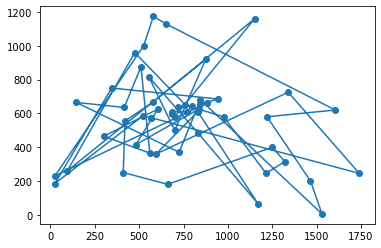

In [13]:
# Gráfico da solução inicial - Nearest Neighbor

plot_route(r)
print(f"Total distance initial solution: {total_distance(r, dist_mat)}")

In [14]:
# Solução final iteração e a sua ordenação

r = local_search(r)
print(r)

22170.27885765254
22100.455367499068
22002.513576451955
20816.395273219787
20763.072865377242
20724.257181832454
20406.53707432894
20359.839881225522
20057.42242992604
19996.382035541155
19986.72931711715
19780.426988943364
19780.140668097603
19760.389590388808
19708.814751932914
19612.106814926316
19491.679621954474
19229.003758018596
19167.912412838574
18871.83696296047
18806.52031043327
18804.74211304837
18564.430333876167
18559.0099082025
18502.838129156855
18468.040361983716
18261.99256502628
18197.18740645757
18053.189080397013
18034.05336323357
18020.09695306246
17793.708253707133
17739.71087475668
17633.574999205284
17627.788713828264
17491.36919901753
17437.256703490915
17437.256703490908
17327.330671898908
16934.72510082381
16901.457863518157
16641.990865074305
16446.311113045627
16246.111207912934
16246.111207912933
16232.59457599907
15823.166287878847
15684.715219325588
15596.317619090398
15596.317619090396
15593.709415661946
15511.831804094241
15446.0386574861
15444.900734

Total distance final solution: 8080.923218867667


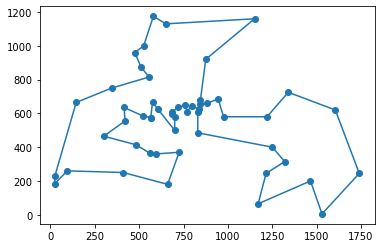

In [15]:
# Gráfico representativo da melhor rota

print(f"Total distance final solution: {total_distance(r, dist_mat)}")
plot_route(r)